# Zach Fechko
## Finding Phishing Websites Using Machine Learning

# Introduction

## What is Phishing

In [1]:
#importing basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff

The dataset gives each category a value of -1, 0, or 1

- -1 signifies a phishing website
- 0 signifies a website doesn't contain a given property
- 1 signifies a legitimate website

In [2]:
#reading in the dataset from arff file
data = arff.loadarff('data/Training Dataset.arff')
df = pd.DataFrame(data[0])


#convert values with b'1' to 1 and b'-1' to -1
df.replace(b'1', 1, inplace=True)
df.replace(b'-1', -1, inplace=True)
df.replace(b'0', 0, inplace=True)
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [3]:
test = pd.read_csv('data/test.csv')
test.head()


,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

## Visualizing the Data

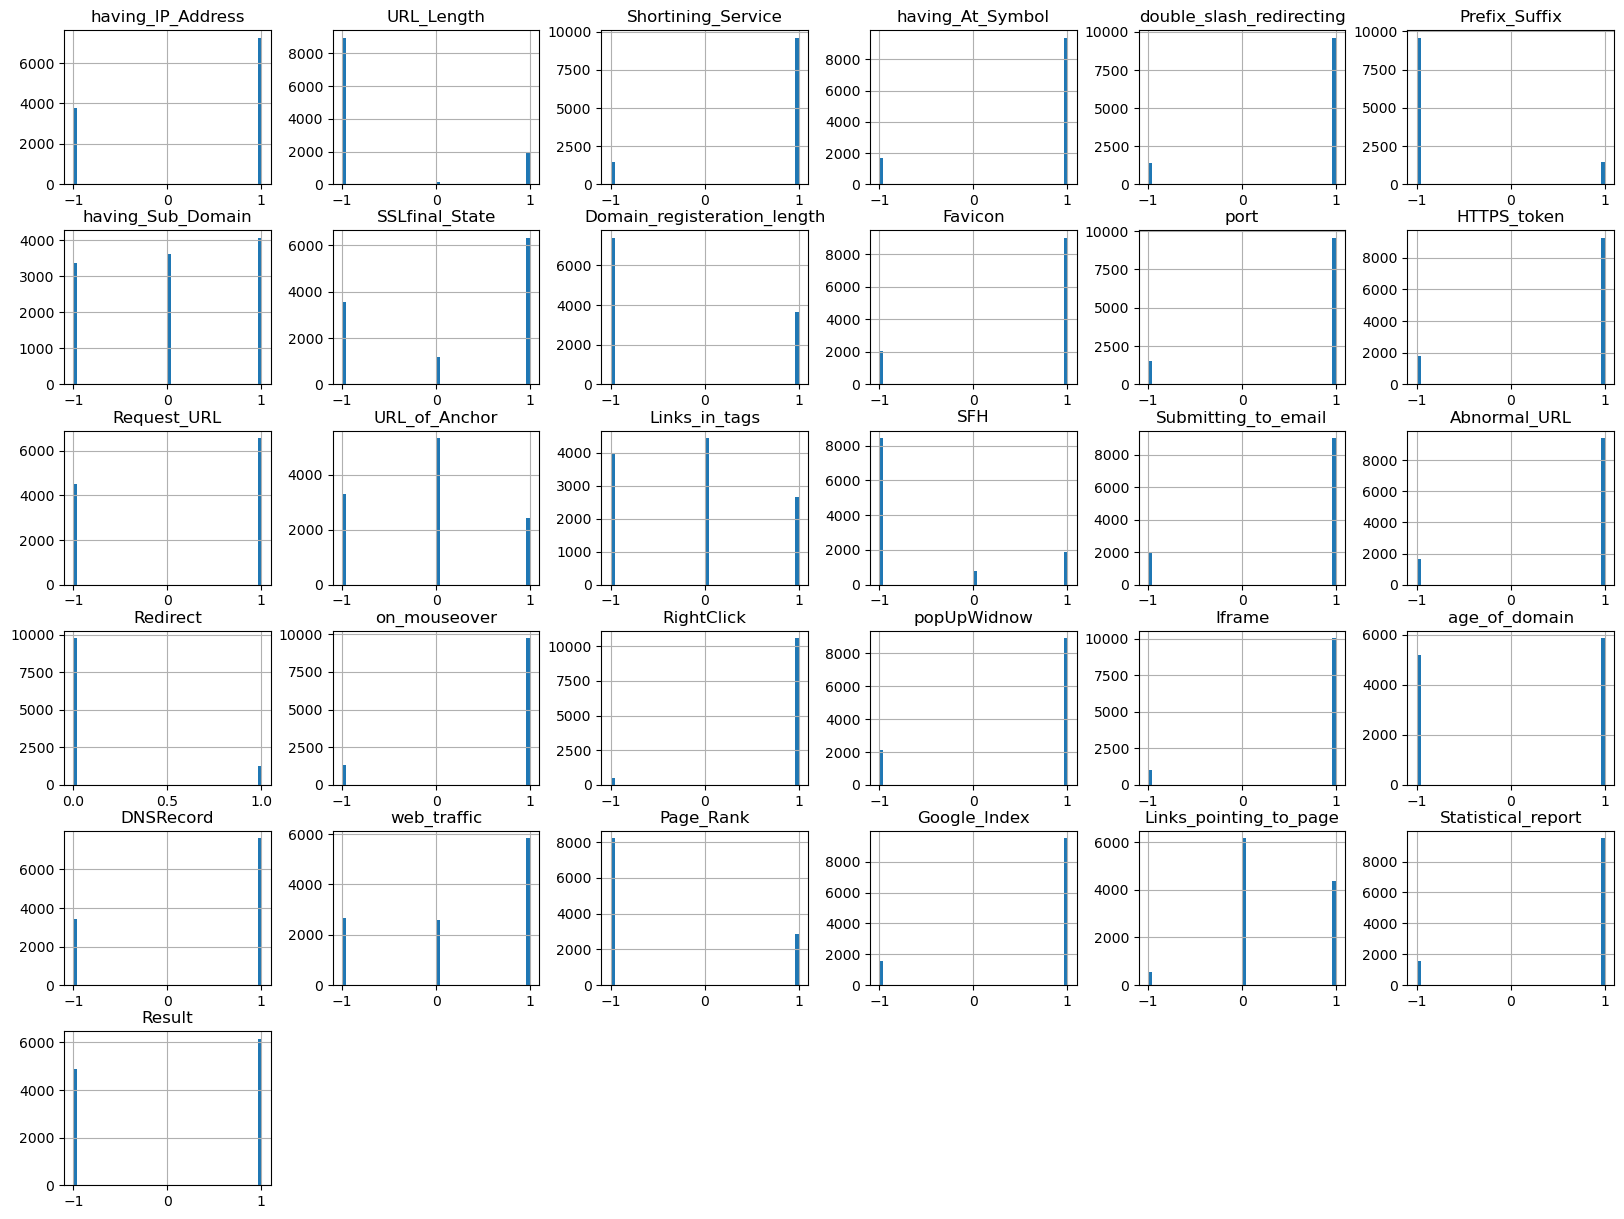

In [5]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Creating correlation heatmap

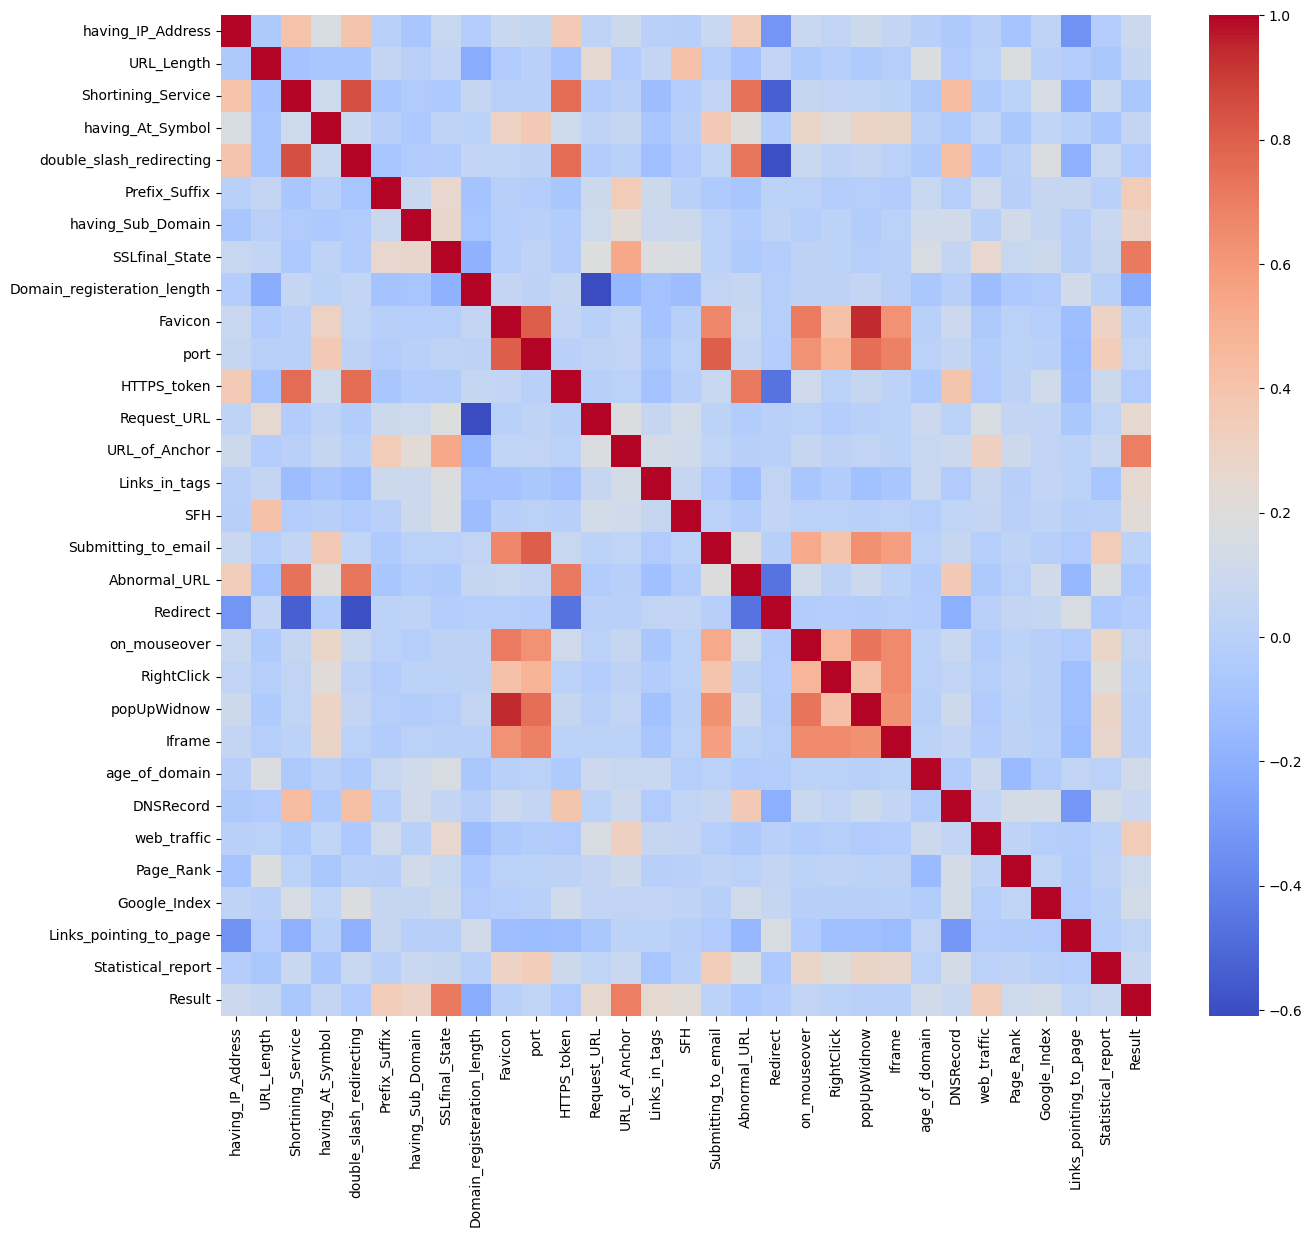

In [6]:
plt.figure(figsize=(15,13))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()

## Prepping the data to be used in ML models

Here we make sure that the data is clean and ready to use by the models

In [7]:
df.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Because this dataset only contains boolean values $\{-1, 1\}$ and an invalid value of $0$ we don't have to do any further pre processing aside from omitting the `index` column when splitting the dataset into training and testing sets

## Splitting the data and creating training/testing sets

- X contains all of the criteria from index to statistical result
- Y contains the actual result of whether a website is phishy or legitimate (-1 for phishy, 1 for legitimate)

In [8]:
# importing packages for data preprocessing
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# splitting the dataset into training and testing set with 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X.shape, y.shape

((11055, 30), (11055,))

In [9]:
new_y = test['Label']
new_X = test.drop('Label', axis=1)

#splitting the dataset into the training set and test set
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, new_y, test_size=0.2, random_state=42)

# Training the models

Due to the nature of the dataset, it is clear that this is a supervised machine learning task, which has two major types of problems, classification, and regression. Because a website can be labeled either phishy(-1) or legitimate(1) we are going to be using classifiers. The supervised models I will be using are as follows:

- Decision Tree
- Random Forest
- Logistic Regression
- Linear SVM

In [10]:
#importing packages for comparing accuracy
from sklearn.metrics import accuracy_score

# these lists will be used to store the accuracy of each model and will be converted into a single dataframe at the end
model = []
training_accuracy = []
testing_accuracy = []

def store_accuracy(model_name: str, train: float, test: float):
    """
    This function stores the training and testing accuracy of each model in a list
    """
    model.append(model_name)
    training_accuracy.append(round(train, 4))
    testing_accuracy.append(round(test, 4))

## Decision Tree

Decision Trees are one of the most popular classification models when it comes to boolean values like we're using here. A decision tree has a flowchart-like structure, where each node is the question to an if-else question, with each leaf node in the tree being the ending classification. 

In the case of this dataset, the leaf nodes of the decision tree would be -1 for if the website is a phishing website and 1 if it's a legitimate one

In [11]:
from sklearn.tree import DecisionTreeClassifier

# creating a decision tree classifier
dt = DecisionTreeClassifier(random_state=42, max_depth=5)

# training the model
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [12]:
# predicting the values
y_test_tree = dt.predict(X_test)
y_train_tree = dt.predict(X_train)

In [13]:
# calculating the accuracy
train_accuracy = accuracy_score(y_train, y_train_tree)
test_accuracy = accuracy_score(y_test, y_test_tree)

### Evaluating the models

In [14]:
from sklearn.metrics import classification_report
print("Decision Tree Accuracy on Training Set")
print(classification_report(y_train, y_train_tree))

print("Accuracy on Training Set: ", round(train_accuracy, 4) * 100, "%")

Decision Tree Accuracy on Training Set
              precision    recall  f1-score   support

          -1       0.96      0.86      0.91      3942
           1       0.90      0.97      0.93      4902

    accuracy                           0.92      8844
   macro avg       0.93      0.92      0.92      8844
weighted avg       0.92      0.92      0.92      8844

Accuracy on Training Set:  92.17999999999999 %


In [15]:
print("Decision Tree Accuracy on Test Set")
print(classification_report(y_test, y_test_tree))

print("Accuracy on Test Set: ", round(test_accuracy, 4) * 100, "%")

Decision Tree Accuracy on Test Set
              precision    recall  f1-score   support

          -1       0.96      0.86      0.91       956
           1       0.90      0.98      0.94      1255

    accuracy                           0.92      2211
   macro avg       0.93      0.92      0.92      2211
weighted avg       0.93      0.92      0.92      2211

Accuracy on Test Set:  92.49000000000001 %


In [16]:
# storing results
store_accuracy("Decision Tree", round(train_accuracy, 4) * 100, round(test_accuracy, 4) * 100)

### Visualizing the decision tree

In [17]:
# importing packages for visualizing the decision tree
from sklearn.tree import export_graphviz
import graphviz

# visualizing the decision tree
dot = export_graphviz(dt, out_file='figures/decision_tree.gv', feature_names=X.columns.values)

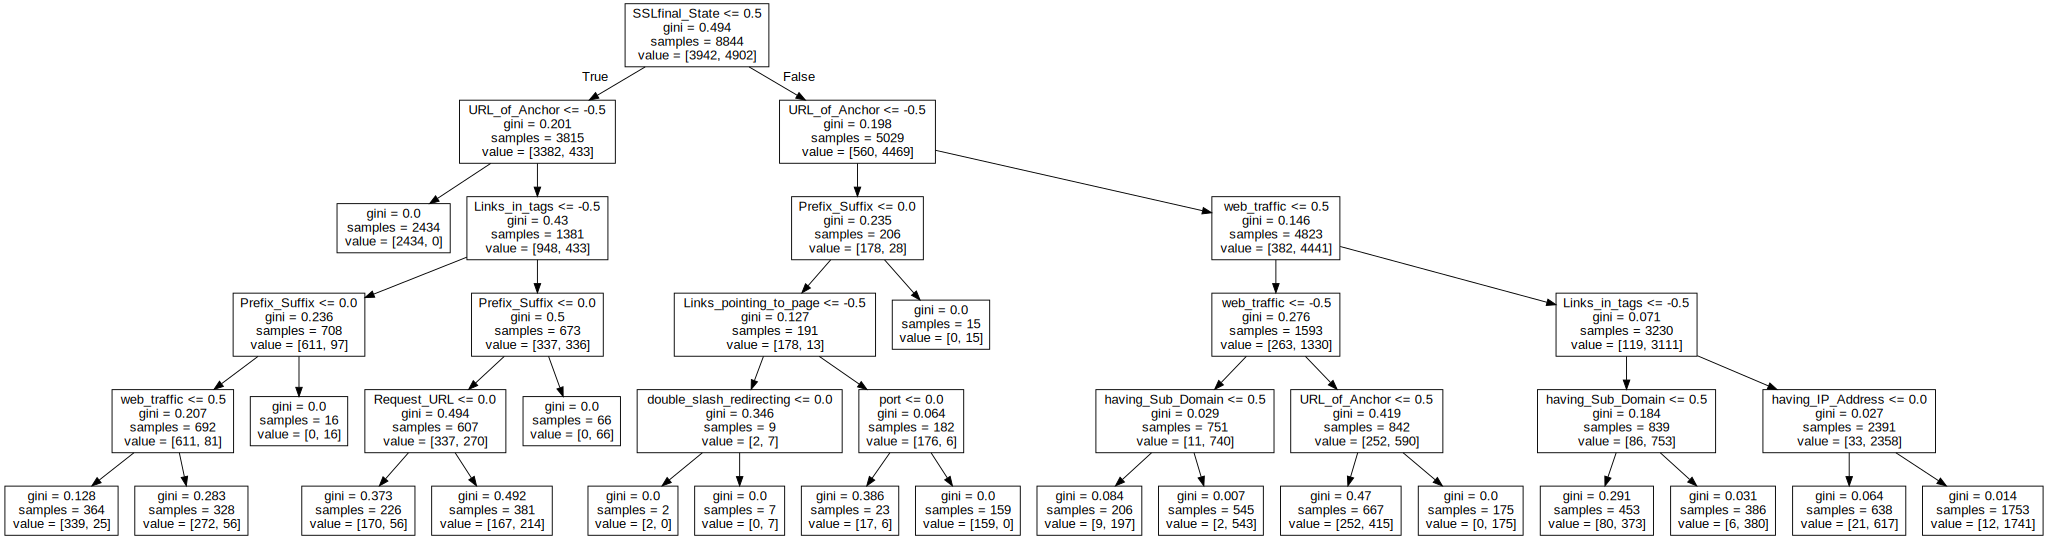

In [18]:
graphviz.Source.from_file('figures/decision_tree.gv')

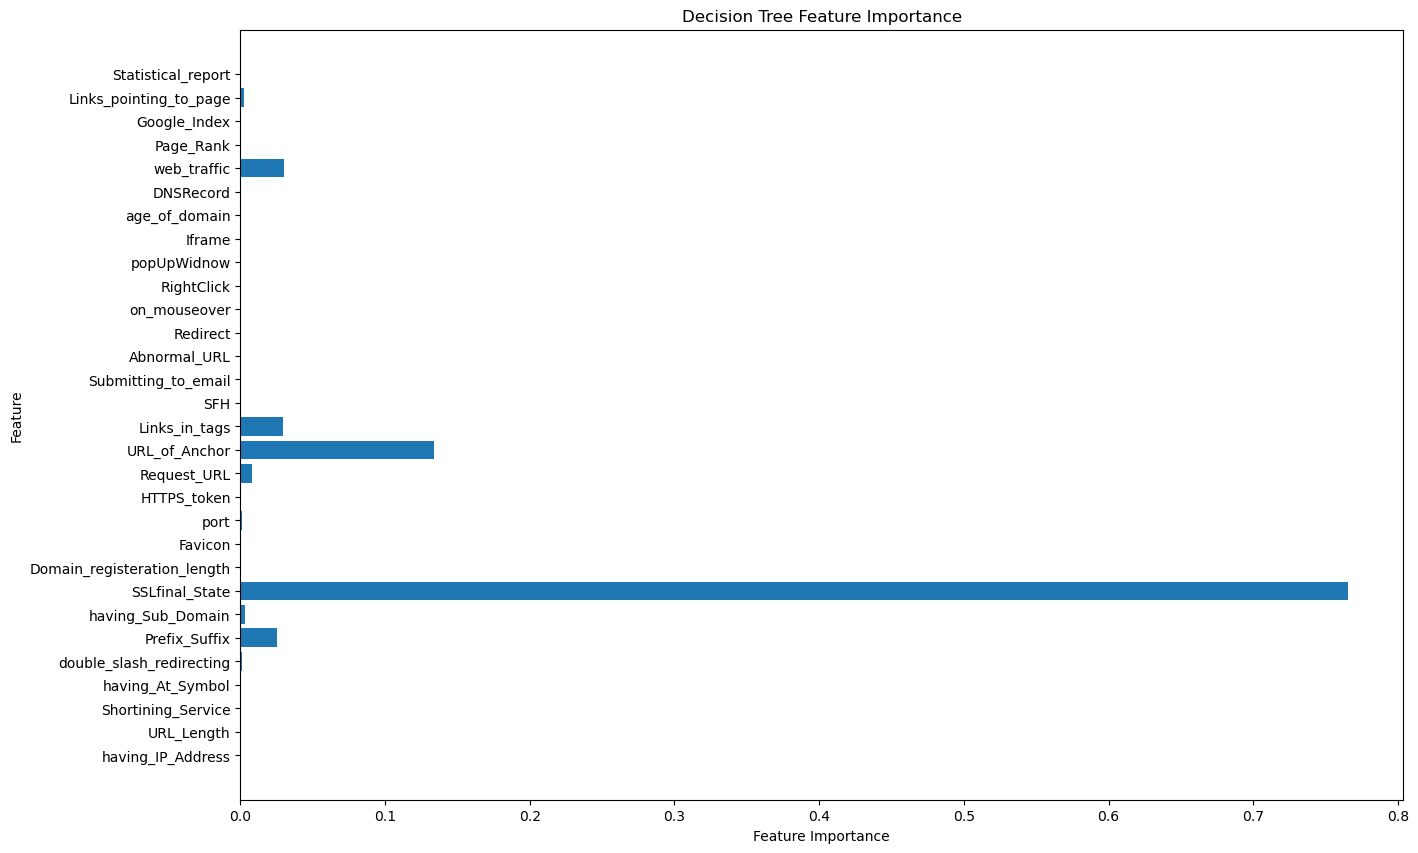

In [19]:
#create feature importance plot
plt.figure(figsize=(15, 10))
features = X_train.shape[1]
plt.barh(range(features), dt.feature_importances_, align='center')
plt.yticks(np.arange(features), X_train.columns)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Decision Tree Feature Importance")
plt.show()

### Identifying False Positives & False Negatives Using Confusion Matrix

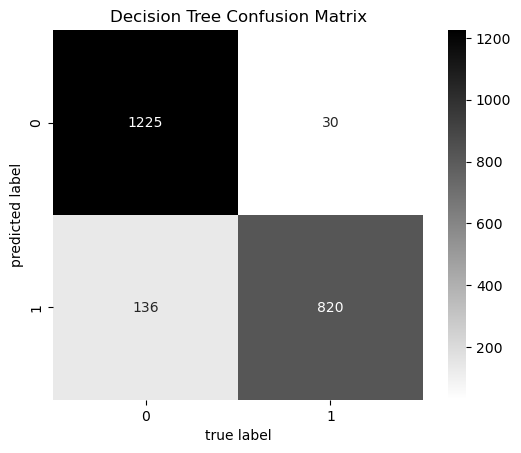

<Figure size 640x480 with 0 Axes>

In [20]:
from sklearn.metrics import confusion_matrix

# creating a confusion matrix for the decision tree
cm = confusion_matrix(y_test, y_test_tree, labels=[1, -1])
sns.heatmap(cm, annot=True, square=True, fmt='d', cmap='binary')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Decision Tree Confusion Matrix')
plt.show()
plt.savefig('figures/decision_tree_confusion_matrix.png')

- 1225 websites were correctly labeled as legitimate  
- 820 correctly labeled as phishing  

## Random Forest Classifier
A random forest is a classifer that is made up of an ensemble of decision trees and each decision tree is slightly different than the others. The main concept with decision trees is that while each tree will do a pretty good job of predicting based on a training set, there is a chance that it will overfit on some part of the data.

By building multiple decision trees and splitting up the data using feature randomness, we create a "forest" of uncorrelated trees where the prediction as a whole is more accurate than any individual tree

In [21]:
from sklearn.ensemble import RandomForestClassifier

# creating a random forest classifier
rf = RandomForestClassifier(random_state=42, max_depth=5)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [22]:
# predicting the values
y_test_rf = rf.predict(X_test)
y_train_rf = rf.predict(X_train)

In [23]:
# calculating the accuracy scores
rf_train_accuracy = accuracy_score(y_train, y_train_rf)
rf_test_accuracy = accuracy_score(y_test, y_test_rf)

In [24]:
# displaying the classification report for the training set
print("Random Forest Accuracy on Training Set")
print(classification_report(y_train, y_train_rf))
print("Accuracy on Training Set: ", round(rf_train_accuracy, 4) * 100, "%")

Random Forest Accuracy on Training Set
              precision    recall  f1-score   support

          -1       0.95      0.90      0.92      3942
           1       0.92      0.96      0.94      4902

    accuracy                           0.93      8844
   macro avg       0.93      0.93      0.93      8844
weighted avg       0.93      0.93      0.93      8844

Accuracy on Training Set:  93.08999999999999 %


In [25]:
print("Random Forest Accuracy on Test Set")
print(classification_report(y_test, y_test_rf))
print("Accuracy on Test Set: ", round(rf_test_accuracy, 4) * 100, "%")

Random Forest Accuracy on Test Set
              precision    recall  f1-score   support

          -1       0.95      0.90      0.92       956
           1       0.93      0.96      0.94      1255

    accuracy                           0.93      2211
   macro avg       0.94      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211

Accuracy on Test Set:  93.44 %


In [26]:
# storing results
store_accuracy("Random Forest", round(rf_train_accuracy, 4) * 100, round(rf_test_accuracy, 4) * 100)

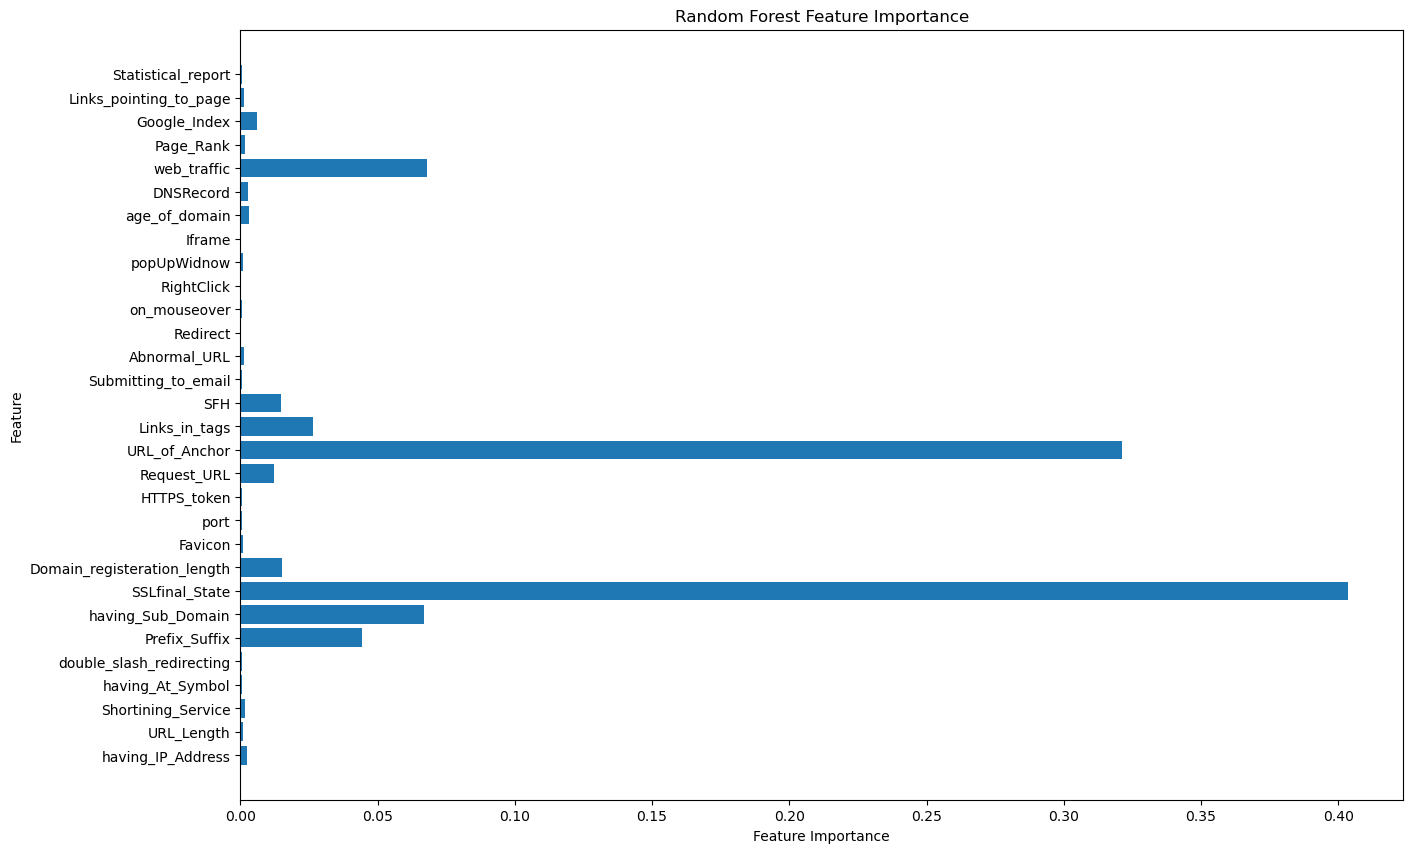

In [27]:
# checking the feature importance
plt.figure(figsize=(15, 10))
features = X_train.shape[1]
plt.barh(range(features), rf.feature_importances_, align='center')
plt.yticks(np.arange(features), X_train.columns)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance")
plt.show()

### Identifying False Positves and False negatives

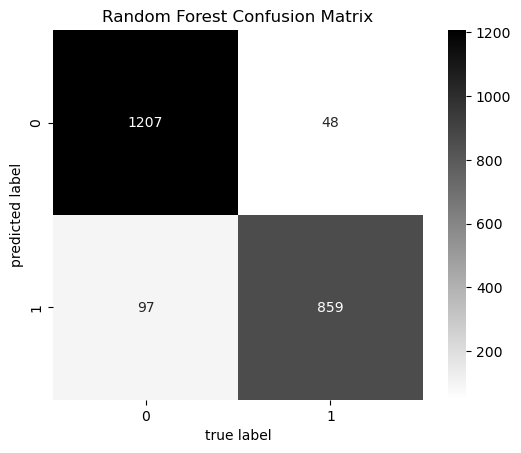

<Figure size 640x480 with 0 Axes>

In [28]:
# creating a confusion matrix for the random forest
cm = confusion_matrix(y_test, y_test_rf, labels=[1, -1])
sns.heatmap(cm, annot=True, square=True, fmt='d', cmap='binary')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Random Forest Confusion Matrix')
plt.show()
plt.savefig('figures/random_forest_confusion_matrix.png')

- 1207 websites were correctly labeled as legitimate
- 859 websites were correctly labeled as phishing

## Logistic Regression

In [29]:
# importing packages for logistic regression
from sklearn.linear_model import LogisticRegression

# creating a logistic regression model for binary classification
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [30]:
# predicting the values
y_test_lr = lr.predict(X_test)
y_train_lr = lr.predict(X_train)

In [31]:
# calculating the accuracy scores
lr_train_accuracy = accuracy_score(y_train, y_train_lr)
lr_test_accuracy = accuracy_score(y_test, y_test_lr)

In [32]:
# displaying the classification report for the training set
print("Logistic Regression Accuracy on Training Set")
print(classification_report(y_train, y_train_lr))
print("Accuracy on Training Set: ", round(lr_train_accuracy, 4) * 100, "%")

Logistic Regression Accuracy on Training Set
              precision    recall  f1-score   support

          -1       0.93      0.91      0.92      3942
           1       0.93      0.95      0.94      4902

    accuracy                           0.93      8844
   macro avg       0.93      0.93      0.93      8844
weighted avg       0.93      0.93      0.93      8844

Accuracy on Training Set:  92.94 %


In [33]:
# displaying the classification report for the test set
print("Logistic Regression Accuracy on Test Set")
print(classification_report(y_test, y_test_lr))
print("Accuracy on Test Set: ", round(lr_test_accuracy, 4) * 100, "%")

Logistic Regression Accuracy on Test Set
              precision    recall  f1-score   support

          -1       0.92      0.90      0.91       956
           1       0.93      0.94      0.93      1255

    accuracy                           0.92      2211
   macro avg       0.92      0.92      0.92      2211
weighted avg       0.92      0.92      0.92      2211

Accuracy on Test Set:  92.4 %


In [34]:
# storing results
store_accuracy("Logistic Regression", round(lr_train_accuracy, 4) * 100, round(lr_test_accuracy, 4) * 100)

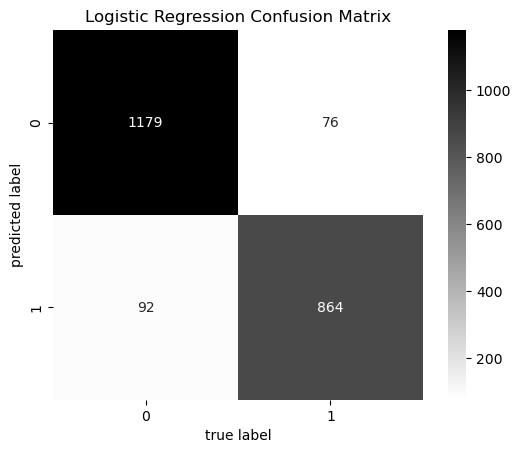

<Figure size 640x480 with 0 Axes>

In [35]:
# creating a confusion matrix for the logistic regression
cm = confusion_matrix(y_test, y_test_lr, labels=[1, -1])
sns.heatmap(cm, annot=True, square=True, fmt='d', cmap='binary')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Logistic Regression Confusion Matrix')
plt.show()
plt.savefig('figures/logistic_regression_confusion_matrix.png')

- 1179 websites were correctly labeled as legitimate
- 864 websites were correctly labeled as phishing

## Supervised Vector Machine (SVM Classification)

### Creating and fitting the model

In [36]:
# importing packages for SVM classifer
from sklearn.svm import SVC

# creating a SVM classifier
svm = SVC(kernel='linear', C=1.0,random_state=42) # using linear kernel with C=1.0

# training the model
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [37]:
# predicting the values
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

In [38]:
# calculating the accuracy scores
svm_train_accuracy = accuracy_score(y_train, y_train_svm)
svm_test_accuracy = accuracy_score(y_test, y_test_svm)

In [39]:
# displaying the classification report for the training set
print("SVM Accuracy on Training Set")
print(classification_report(y_train, y_train_svm))
print("Accuracy on Training Set: ", round(svm_train_accuracy, 4) * 100, "%")

SVM Accuracy on Training Set
              precision    recall  f1-score   support

          -1       0.93      0.91      0.92      3942
           1       0.93      0.95      0.94      4902

    accuracy                           0.93      8844
   macro avg       0.93      0.93      0.93      8844
weighted avg       0.93      0.93      0.93      8844

Accuracy on Training Set:  92.84 %


In [40]:
# displaying the classification report for the test set
print("SVM Accuracy on Test Set")
print(classification_report(y_test, y_test_svm))
print("Accuracy on Test Set: ", round(svm_test_accuracy, 4) * 100, "%")

SVM Accuracy on Test Set
              precision    recall  f1-score   support

          -1       0.93      0.90      0.92       956
           1       0.93      0.95      0.94      1255

    accuracy                           0.93      2211
   macro avg       0.93      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211

Accuracy on Test Set:  92.85 %


In [41]:
# storing results
store_accuracy("SVM", round(svm_train_accuracy, 4) * 100, round(svm_test_accuracy, 4) * 100)

### Identifying False Positives and Negatives

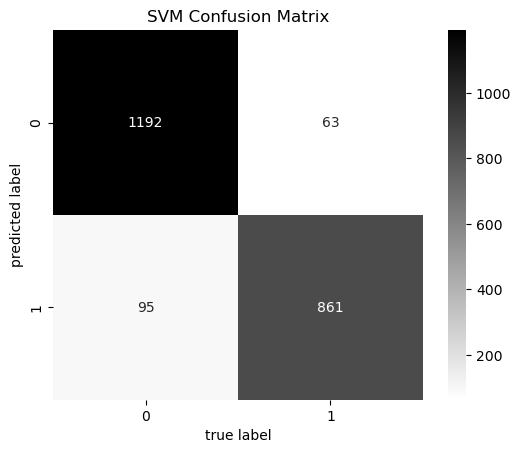

<Figure size 640x480 with 0 Axes>

In [42]:
# creating a confusion matrix for the SVM
cm = confusion_matrix(y_test, y_test_svm, labels=[1, -1])
sns.heatmap(cm, annot=True, square=True, fmt='d', cmap='binary')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('SVM Confusion Matrix')
plt.show()
plt.savefig('figures/svm_confusion_matrix.png')

- 1192 websites were correctly identified as legitimate
- 861 websites were correctly identified as phishing

# Comparing all the Models

In [43]:
# creating dataframe with all the results
results = pd.DataFrame({"ML Model": model, "Training Accuracy": training_accuracy, "Test Accuracy": testing_accuracy})
results

,ML Model,Training Accuracy,Test Accuracy
0,Decision Tree,92.18,92.49
1,Random Forest,93.09,93.44
2,Logistic Regression,92.94,92.40
3,SVM,92.84,92.85


In [44]:
# sorting the results by accuracy
results.sort_values(by=['Training Accuracy', 'Test Accuracy'], ascending=False)

,ML Model,Training Accuracy,Test Accuracy
1,Random Forest,93.09,93.44
2,Logistic Regression,92.94,92.40
3,SVM,92.84,92.85
0,Decision Tree,92.18,92.49


Out of these 4 models we can see that random forest is the model that will best fit the given dataset

<Figure size 4000x8000 with 0 Axes>

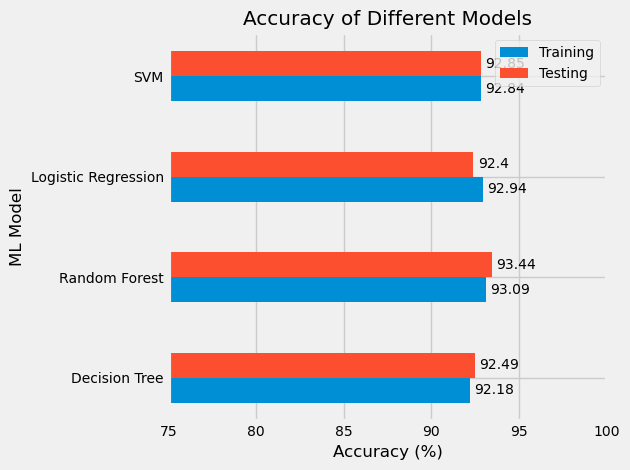

<Figure size 640x480 with 0 Axes>

In [47]:
# plotting the results in a bar chart, one bar for training accuracy and one for test accuracy
plt.figure(figsize=(40, 80))
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 10})

labels = results['ML Model']
x = np.arange(len(labels))
width = 0.25
fig, ax = plt.subplots()
rects1 = ax.barh(x - width/2, training_accuracy, width, label='Training')
rects2 = ax.barh(x + width/2, testing_accuracy, width, label='Testing')


ax.set_xlabel('Accuracy (%)')
ax.set_ylabel('ML Model')
ax.set_title('Accuracy of Different Models')
ax.set_yticks(x, labels)
ax.set_yticklabels(labels)
ax.set_xlim(75, 100)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

plt.savefig('figures/comparison.png')

Looking at the graph and seeing that the bars are mostly even we can come to the conclusion that the models were properly fit from the data